# Ridge, Lasso, & Elastic Net Regression in Python
#### This is a practice of what's on https://youtu.be/ctmNq7FgbvI
#### Data is from https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set
#### & https://archive.ics.uci.edu/ml/machine-learning-databases/00551/
#### (gt_2015.csv)

In [1]:
# Read data
import pandas as pd
import numpy as np

GTdata = pd.read_csv('gt_2015.csv', header=0)
# Cursory check
GTdata

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.953200,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.219100,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.949150,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.007500,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.285800,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515
5,1.831900,1021.7,76.411,2.8410,23.495,1076.4,549.92,133.58,11.829,2.0812,81.193
6,2.074000,1022.0,75.974,2.7981,22.945,1073.7,549.98,131.53,11.687,2.2529,83.171
7,1.782400,1022.6,73.535,2.8327,23.337,1075.7,550.01,133.18,11.745,3.7350,85.749
8,1.593000,1023.2,72.873,2.8729,23.654,1078.5,550.06,135.38,11.772,3.6398,86.491
9,1.681900,1023.8,72.441,2.9058,23.463,1077.9,550.12,134.86,11.742,3.5866,86.328


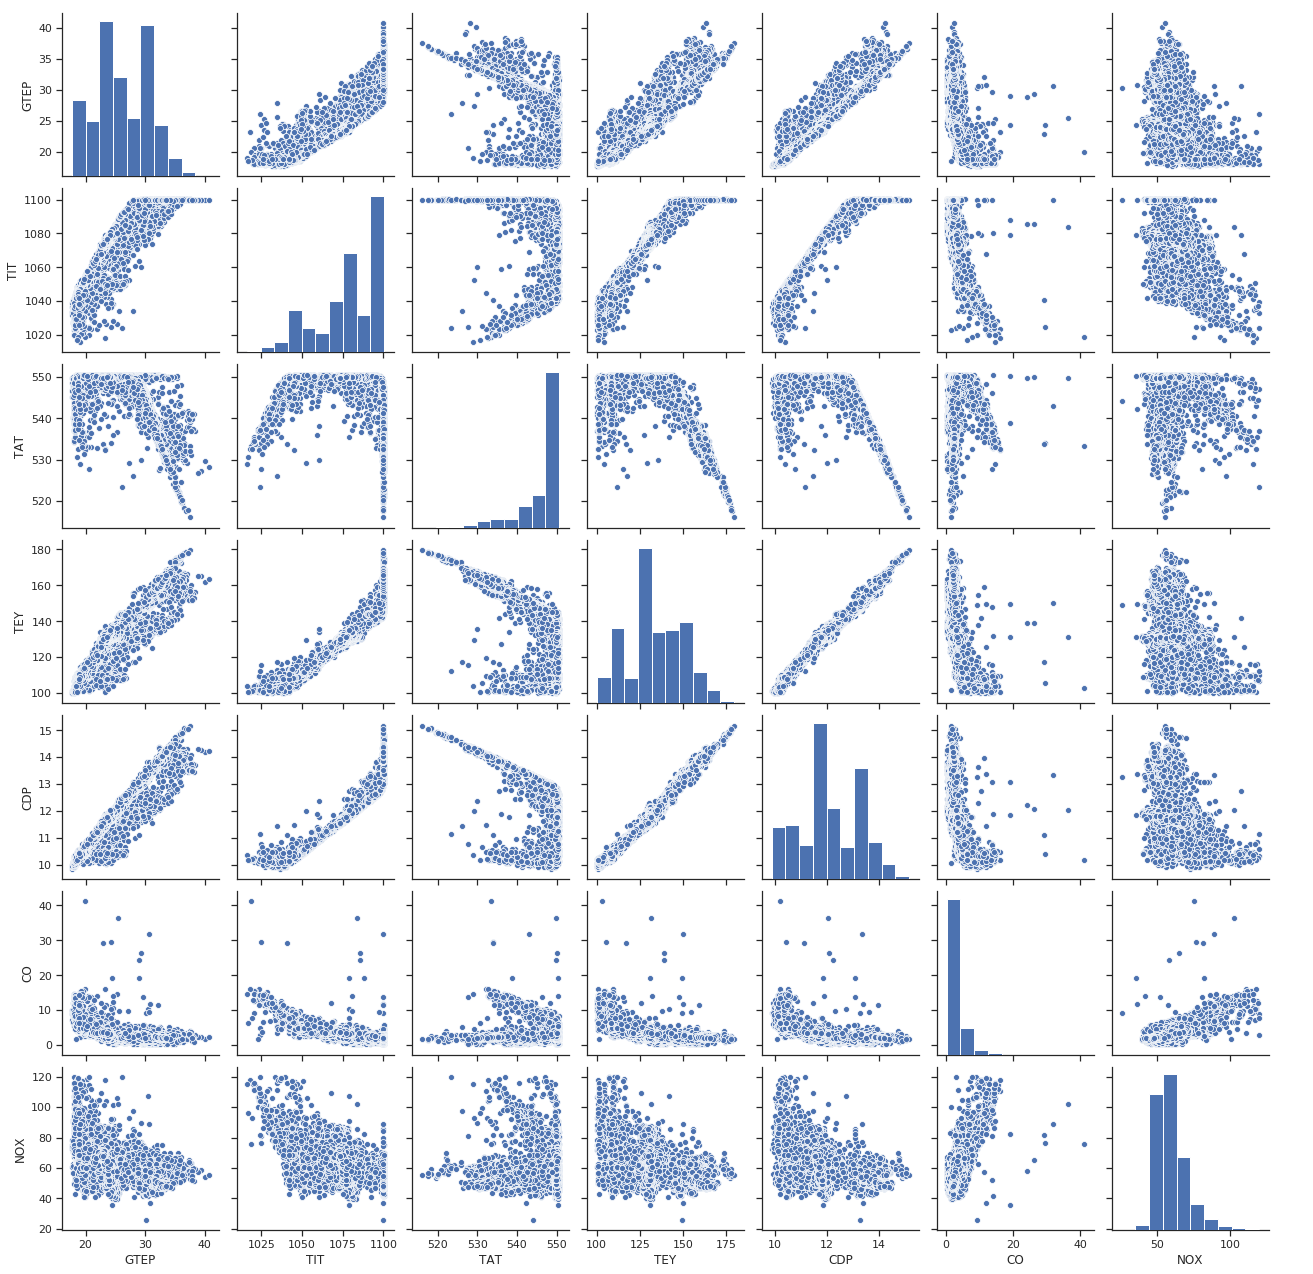

In [4]:
# Matrix plot
import seaborn as sns; sns.set(style="ticks", color_codes=True)
# get a few columns of BCdata.
GTdata_small = GTdata.iloc[:,4:11]
g = sns.pairplot(GTdata_small)

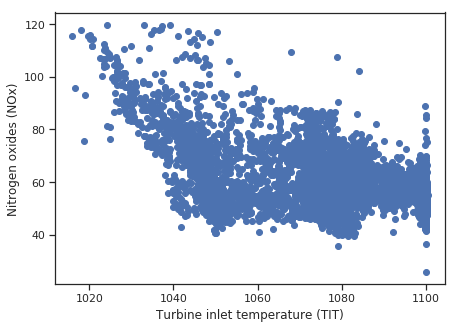

In [3]:
# Plot 'Nitrogen oxides (NOx)'(y) vs 'Turbine inlet temperature (TIT)'(x)
import matplotlib.pyplot as plt

x=GTdata['TIT']
y=GTdata['NOX']

fig = plt.figure(figsize=(7,5))
plt.scatter(x,y)
plt.xlabel('Turbine inlet temperature (TIT)')
plt.ylabel('Nitrogen oxides (NOx)')
plt.show()

In [83]:
# Elastic-Net Regression combines the Lasso Regression penalty and Ridge Regression Penalty.
#
#     the sum of the squared residuals
#   + lambda1 * ( abs(variable1) + abs(variable2) + ... )
#   + lambda2 * (   variable1^2  +   variable2^2  + ... )
#
# glmnet (R) uses a single lambda instead, and another parameter called alpha.
#
#     the sum of the squared residuals
#   + lambda * [ alpha * ( abs(variable1) + abs(variable2) + ... )
#              + (1-alpha) * ( variable1^2 + variable2^2 + ... ) ]
#
# ElasticNetCV (sklearn) uses different greek letter & variable name. ¯\_(ツ)_/¯
#
#     the sum of the squared residuals / (2*n_samples)
#   + alpha * [ l1_ratio * ( abs(variable1) + abs(variable2) + ... )
#             + (1-l1_ratio) * ( variable1^2 + variable2^2 + ... ) ]
#
# When l1_ratio = 0 or 1 we get either Ridge or Lasso Regression. Anything other than 0 or 1, we get Elastic Net.

## Prep data

In [85]:
# Split the data into 2 parts - train and test, 80:20
test_beginRow = int(round(len(GTdata)*0.8,0)+1)
# Convert dataframe to matrix. glmnet likes matrix.
x_train = GTdata.iloc[ :test_beginRow, :10].values
y_train = GTdata.iloc[ :test_beginRow, 10].values.ravel()

x_test  = GTdata.iloc[ test_beginRow:, :10].values
y_test  = GTdata.iloc[ test_beginRow:, 10].values.ravel()

## Ridge Regression (l1_ratio=0)

In [124]:
# Predict NOX using the rest of data
# Load the ElasticNetCV library.
from sklearn.linear_model import ElasticNetCV

# Set a seed for the random number generator so that I get the same results later.
random_seed = 2580

In [196]:
# l1_ratio=0 makes it Ridge Regression, but l1_ratio=0 won't auto generate alpha array, so set it something small
# or supply alphas array.
#
# alphas is a list of alphas where to compute the models. Always print out alphas (regr.alphas_) to see if regr.alpha_ is 
# hitting the limit of the default array. If it's hitting the limit, make a numpay array and supply it.
#
# cv=10 produces 10-fold CV.
#
# random_state is a seed for a random number generator.
#
# max_iter is the number of iterrations until converge. If it gives warning of not converging, increase this.
#
alphas = np.arange(0.01, 1.5, 0.01)
regr = ElasticNetCV(l1_ratio=0.0, alphas=alphas, cv=10, random_state=random_seed, max_iter=5000)
regr.fit(x_train, y_train)

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101405.65752923058, tolerance: 60.436530511002665
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101339.09949872733, tolerance: 60.43

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99596.20630988217, tolerance: 60.436530511002665
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99523.02533833863, tolerance: 60.436530511002665
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95953.86124505126, tolerance: 60.436530511002665
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95862.97309694956, tolerance: 60.436530511002665
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91254.88236775286, tolerance: 60.436530511002665
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91123.93250789453, tolerance: 60.436530511002665
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108157.44479642622, tolerance: 54.55090527363365
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108077.3418178827, tolerance: 54.55090527363365
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is di

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105297.94131197466, tolerance: 54.55090527363365
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105203.3755305804, tolerance: 54.55090527363365
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is di

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100121.52210360627, tolerance: 54.55090527363365
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99990.29546810029, tolerance: 54.55090527363365
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is di

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92148.85437607334, tolerance: 54.55090527363365
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91898.19959227882, tolerance: 54.55090527363365
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is dis

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103092.31825889509, tolerance: 56.421166420873924
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103009.76652222058, tolerance: 56.421166420873924
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99525.92005211636, tolerance: 56.421166420873924
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99423.33901712058, tolerance: 56.421166420873924
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93892.86972818404, tolerance: 56.421166420873924
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93742.21750902344, tolerance: 56.421166420873924
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86561.35625346824, tolerance: 56.421166420873924
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86277.236937167, tolerance: 56.421166420873924
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is dis

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112811.76711460738, tolerance: 66.61749659520156
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112720.77271185684, tolerance: 66.61749659520156
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108212.04307019745, tolerance: 66.61749659520156
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108095.51864270159, tolerance: 66.61749659520156
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101948.29709435346, tolerance: 66.61749659520156
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101776.14563685725, tolerance: 66.61749659520156
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114428.39700000027, tolerance: 69.67216646637026
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114352.3775219252, tolerance: 69.67216646637026
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is di

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112084.30517203399, tolerance: 69.67216646637026
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111997.73100732376, tolerance: 69.67216646637026
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107663.98980316652, tolerance: 69.67216646637026
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107550.44686267746, tolerance: 69.67216646637026
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101319.75937636098, tolerance: 69.67216646637026
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101134.14156472229, tolerance: 69.67216646637026
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119003.38772533259, tolerance: 69.03717073826425
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118921.59596975864, tolerance: 69.03717073826425
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115804.10848245499, tolerance: 69.03717073826425
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115706.57908017423, tolerance: 69.03717073826425
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110315.37564753096, tolerance: 69.03717073826425
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110177.36152437958, tolerance: 69.03717073826425
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101723.875100427, tolerance: 69.03717073826425
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101421.95504517604, tolerance: 69.03717073826425
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is dis

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115488.23864665537, tolerance: 66.07227797395186
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115399.49179646348, tolerance: 66.07227797395186
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111082.64011754385, tolerance: 66.07227797395186
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110967.96819182587, tolerance: 66.07227797395186
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104682.31568906091, tolerance: 66.07227797395186
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104507.06826599363, tolerance: 66.07227797395186
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110965.50783823422, tolerance: 70.36882151201509
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110882.54176833603, tolerance: 70.36882151201509
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108416.19129855733, tolerance: 70.36882151201509
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108322.3656257046, tolerance: 70.36882151201509
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is di

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103523.51967463816, tolerance: 70.36882151201509
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103400.37572318446, tolerance: 70.36882151201509
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96576.16668331694, tolerance: 70.36882151201509
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96368.88457450262, tolerance: 70.36882151201509
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is dis

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118538.8049986965, tolerance: 69.8944378320787
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118453.27938339753, tolerance: 69.8944378320787
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is disc

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115178.15603165427, tolerance: 69.8944378320787
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115075.19582845719, tolerance: 69.8944378320787
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is dis

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109771.79790138193, tolerance: 69.8944378320787
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109628.03717640332, tolerance: 69.8944378320787
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is dis

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101007.11967460405, tolerance: 69.8944378320787
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100714.09071351375, tolerance: 69.8944378320787
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is dis

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100772.86509464377, tolerance: 64.00706496029736
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100694.17688331554, tolerance: 64.00706496029736
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97163.40306377505, tolerance: 64.00706496029736
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97063.51006722517, tolerance: 64.00706496029736
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is dis

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91893.5466255668, tolerance: 64.00706496029736
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91744.99061085985, tolerance: 64.00706496029736
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is disc

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81311.65398324293, tolerance: 64.00706496029736
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80818.24017904876, tolerance: 64.00706

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66...
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49]),
             copy_X=True, cv=10, eps=0.001, fit_intercept=True, l1_ratio=0.0,
             max_iter=5000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=2580,
             selection='cyclic', tol=0.0001, verbose=0)

In [194]:
# Show what regr produced. alpha_ is equivalent to lambda in glmnet of R.
print(regr.alpha_)

0.02


In [198]:
# Predict using the model.
# Use regr.predict
y_predict = regr.predict(x_test)
y_predict

array([55.84565995, 56.08460767, 55.75909486, ..., 80.42296717,
       66.73515196, 85.9075188 ])

In [208]:
# Calculate mean squared error.
sum((y_test-y_predict)**2)/len(y_test)

63.58725950666814

In [210]:
# Check the resulting coefficients.
print(regr.coef_)

[-1.70515386 -0.35517306 -0.28593135  1.41216288 -0.09175803  1.60255207
 -1.18669892 -2.18602352  0.84517382  2.18818148]


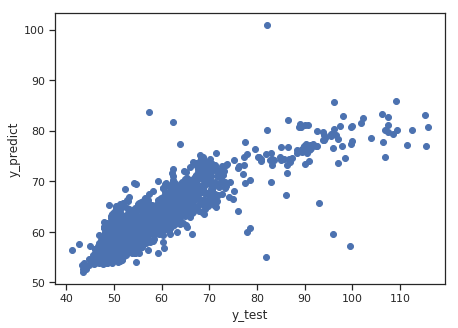

In [213]:
# Plot 'Nitrogen oxides (NOx)'(y) vs 'Turbine inlet temperature (TIT)'(x)
import matplotlib.pyplot as plt

x=y_test
y=y_predict

fig = plt.figure(figsize=(7,5))
plt.scatter(x,y)
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()

## Lasso Regression (l1_ratio=1)

In [124]:
# Predict NOX using the rest of data
# Load the ElasticNetCV library.
from sklearn.linear_model import ElasticNetCV

# Set a seed for the random number generator so that I get the same results later.
random_seed = 2580

In [228]:
# l1_ratio=1 makes it Lasso Regression.
#
# alphas is a list of alphas where to compute the models. Always print out alphas (regr.alphas_) to see if regr.alpha_ is 
# hitting the limit of the default array. If it's hitting the limit, make a numpay array and supply it.
#
# cv=10 produces 10-fold CV.
#
# random_state is a seed for a random number generator.
#
# max_iter is the number of iterrations until converge. If it gives warning of not converging, increase this.
#
alphas = np.arange(0.0001, 0.03, 0.0001)
regr = ElasticNetCV(l1_ratio=1.0, alphas=alphas, cv=10, random_state=random_seed, max_iter=5000)
regr.fit(x_train, y_train)

/home/fastcyclist/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10367.397830516245, tolerance: 72.40492307083929
  positive)


ElasticNetCV(alphas=array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 ,
       0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.004...
       0.0273, 0.0274, 0.0275, 0.0276, 0.0277, 0.0278, 0.0279, 0.028 ,
       0.0281, 0.0282, 0.0283, 0.0284, 0.0285, 0.0286, 0.0287, 0.0288,
       0.0289, 0.029 , 0.0291, 0.0292, 0.0293, 0.0294, 0.0295, 0.0296,
       0.0297, 0.0298, 0.0299]),
             copy_X=True, cv=10, eps=0.001, fit_intercept=True, l1_ratio=1.0,
             max_iter=5000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=2580,
             selection='cyclic', tol=0.0001, verbose=0)

In [229]:
# Show what regr produced. alpha_ is equivalent to lambda in glmnet of R.
print(regr.alpha_)

0.0001


In [230]:
# Predict using the model.
# Use regr.predict
y_predict = regr.predict(x_test)
y_predict

array([55.84404365, 56.37729055, 55.43920521, ..., 82.13173785,
       67.98820058, 87.24694949])

In [231]:
# Calculate mean squared error.
sum((y_test-y_predict)**2)/len(y_test)

64.77884104765481

In [232]:
# Check the resulting coefficients.
print(regr.coef_)

[-1.79865114 -0.36724415 -0.29547438  2.88825932 -0.08335953  1.38302016
 -0.81454414 -2.35285811  7.39541357  2.19052545]


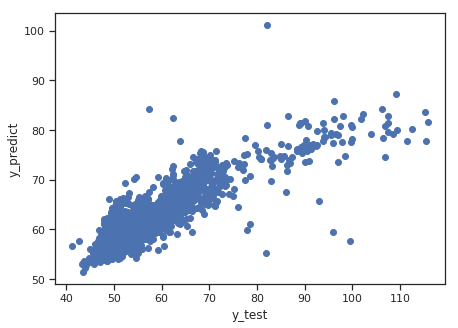

In [233]:
# Plot 'Nitrogen oxides (NOx)'(y) vs 'Turbine inlet temperature (TIT)'(x)
import matplotlib.pyplot as plt

x=y_test
y=y_predict

fig = plt.figure(figsize=(7,5))
plt.scatter(x,y)
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()

## Elastic Net Regression (alpha=0.5)

In [234]:
# Predict NOX using the rest of data
# Load the ElasticNetCV library.
from sklearn.linear_model import ElasticNetCV

# Set a seed for the random number generator so that I get the same results later.
random_seed = 2580

In [248]:
# l1_ratio=0.5 makes it Elastic Net Regression.
#
# alphas is a list of alphas where to compute the models. Always print out alphas (regr.alphas_) to see if regr.alpha_ is 
# hitting the limit of the default array. If it's hitting the limit, make a numpay array and supply it.
#
# cv=10 produces 10-fold CV.
#
# random_state is a seed for a random number generator.
#
# max_iter is the number of iterrations until converge. If it gives warning of not converging, increase this.
#
alphas = np.arange(0.0201, 0.03, 0.0001)
regr = ElasticNetCV(l1_ratio=0.5, alphas=alphas, cv=10, random_state=random_seed, max_iter=5000)
regr.fit(x_train, y_train)

ElasticNetCV(alphas=array([0.0201, 0.0202, 0.0203, 0.0204, 0.0205, 0.0206, 0.0207, 0.0208,
       0.0209, 0.021 , 0.0211, 0.0212, 0.0213, 0.0214, 0.0215, 0.0216,
       0.0217, 0.0218, 0.0219, 0.022 , 0.0221, 0.0222, 0.0223, 0.0224,
       0.0225, 0.0226, 0.0227, 0.0228, 0.0229, 0.023 , 0.0231, 0.0232,
       0.0233, 0.0234, 0.0235, 0.0236, 0.0237, 0.0238, 0.0239, 0.024 ,
       0.0241, 0.0242, 0.0243, 0.0244, 0.0245, 0.0246, 0.024...
       0.0273, 0.0274, 0.0275, 0.0276, 0.0277, 0.0278, 0.0279, 0.028 ,
       0.0281, 0.0282, 0.0283, 0.0284, 0.0285, 0.0286, 0.0287, 0.0288,
       0.0289, 0.029 , 0.0291, 0.0292, 0.0293, 0.0294, 0.0295, 0.0296,
       0.0297, 0.0298, 0.0299]),
             copy_X=True, cv=10, eps=0.001, fit_intercept=True, l1_ratio=0.5,
             max_iter=5000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=2580,
             selection='cyclic', tol=0.0001, verbose=0)

In [249]:
# Show what regr produced. alpha_ is equivalent to lambda in glmnet of R.
print(regr.alpha_)

0.028699999999999948


In [250]:
# Predict using the model.
# Use regr.predict
y_predict = regr.predict(x_test)
y_predict

array([55.85615565, 56.0697234 , 55.79941977, ..., 80.24624208,
       66.59200313, 85.75773721])

In [251]:
# Calculate mean squared error.
sum((y_test-y_predict)**2)/len(y_test)

63.397747930366876

In [252]:
# Check the resulting coefficients.
print(regr.coef_)

[-1.69182405 -0.35245807 -0.2842736   1.2339875  -0.08546913  1.61267017
 -1.20840563 -2.16149721  0.31039739  2.18932631]


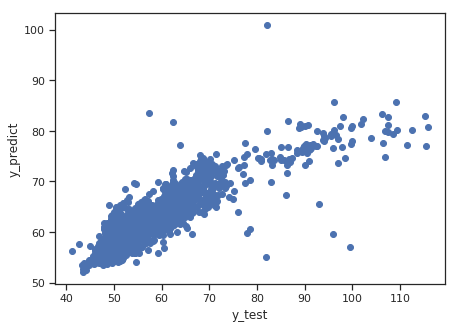

In [253]:
# Plot 'Nitrogen oxides (NOx)'(y) vs 'Turbine inlet temperature (TIT)'(x)
import matplotlib.pyplot as plt

x=y_test
y=y_predict

fig = plt.figure(figsize=(7,5))
plt.scatter(x,y)
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()